In [6]:
# ============================================
# BLOQUE 1.1 - IMPORTACIÓN DE LIBRERÍAS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [23]:
# ============================================
# BLOQUE 1.2 - CARGA DE ARCHIVOS DESDE EL DATASET
# ============================================

# Ruta base donde se encuentra el dataset
base_path = '../data/UCI HAR Dataset/'

# Cargar archivos de entrenamiento

# X_train.txt → Datos de sensores (561 características)
X_train = pd.read_csv(os.path.join(base_path, 'train', 'X_train.txt'), 
                      sep=r'\s+', header=None)

# y_train.txt → Etiquetas de actividad (1 a 6)
y_train = pd.read_csv(os.path.join(base_path, 'train', 'y_train.txt'), 
                      header=None, names=['activity'])

# subject_train.txt → ID del sujeto que realizó la actividad
subjects_train = pd.read_csv(os.path.join(base_path, 'train', 'subject_train.txt'), 
                             header=None, names=['subject'])

# features.txt → Nombres de las características
features = pd.read_csv(os.path.join(base_path, 'features.txt'), 
                       sep=r'\s+', header=None, names=['index', 'feature_name'])


In [9]:
# ============================================
# BLOQUE 1.3 - NOMBRAR COLUMNAS Y UNIR DATAFRAMES
# ============================================

# Asignar nombres de columnas a X_train
X_train.columns = features['feature_name']

# Combinar todo en un solo DataFrame
df_train = pd.concat([subjects_train, y_train, X_train], axis=1)


In [10]:
# ============================================
# BLOQUE 1.4 - VISTA PREVIA DEL DATASET
# ============================================

print("✅ Dimensiones del dataset combinado:", df_train.shape)
print("\n📌 Primeras filas del DataFrame:")
df_train.head()


✅ Dimensiones del dataset combinado: (7352, 563)

📌 Primeras filas del DataFrame:


,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [11]:
# ============================================
# BLOQUE 2.1 - DISTRIBUCIÓN DE CLASES (ACTIVIDADES)
# ============================================

# Ver actividades únicas en el dataset
print("🔍 Actividades únicas (códigos numéricos):")
print(df_train['activity'].unique())

# Contar cuántas muestras hay de cada clase
actividad_conteo = df_train['activity'].value_counts().sort_index()

print("\n📊 Cantidad de muestras por clase (código):")
print(actividad_conteo)


🔍 Actividades únicas (códigos numéricos):
[5 4 6 1 3 2]

📊 Cantidad de muestras por clase (código):
activity
1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: count, dtype: int64


In [12]:
# ============================================
# BLOQUE 2.2 - ASOCIAR NOMBRES REALES A CADA CÓDIGO DE ACTIVIDAD
# ============================================

# Cargar nombres de las actividades desde el archivo
activity_labels = pd.read_csv(os.path.join(base_path, 'activity_labels.txt'),
                              header=None, sep=r'\s+', names=['code', 'label'])

# Crear diccionario de mapeo: código → nombre
activity_map = dict(zip(activity_labels['code'], activity_labels['label']))

# Agregar una nueva columna al DataFrame con nombres legibles
df_train['activity_name'] = df_train['activity'].map(activity_map)

# Mostrar muestra del DataFrame con el nuevo nombre de actividad
df_train[['subject', 'activity', 'activity_name']].head()


,subject,activity,activity_name
0,1,5,STANDING
1,1,5,STANDING
2,1,5,STANDING
3,1,5,STANDING
4,1,5,STANDING


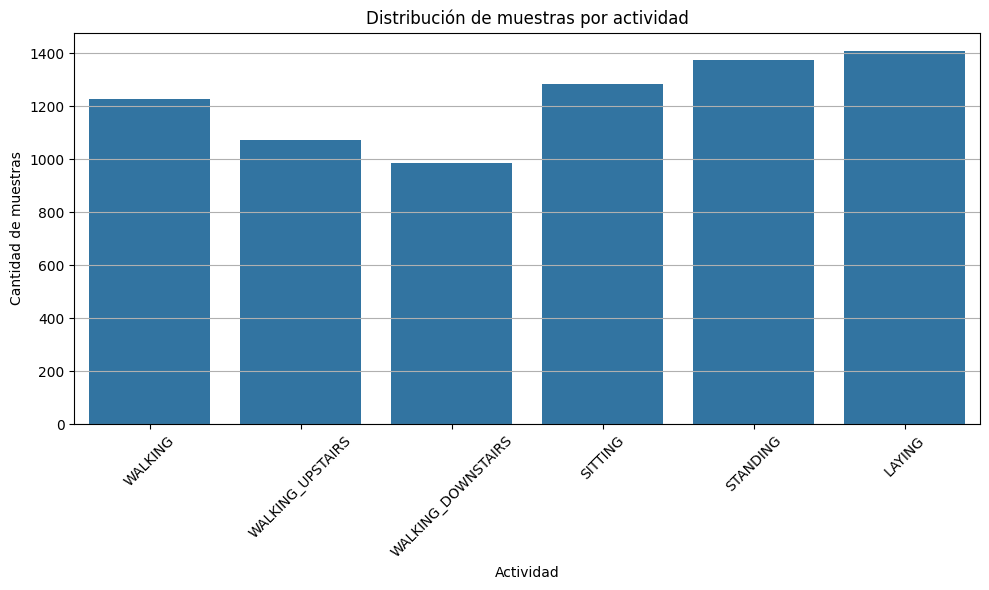

In [13]:
# ============================================
# BLOQUE 2.3 - GRÁFICO DE BARRAS DE ACTIVIDADES
# ============================================

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='activity_name', order=activity_labels['label'])
plt.title('Distribución de muestras por actividad')
plt.xlabel('Actividad')
plt.ylabel('Cantidad de muestras')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../results/distribucion_actividades.png')
plt.show()


In [14]:
# ============================================
# BLOQUE 3.1 - ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES
# ============================================

# Mostrar un resumen estadístico de las primeras variables principales
print("📈 Resumen estadístico de las primeras 10 variables:")
df_train.iloc[:, 2:12].describe()


📈 Resumen estadístico de las primeras 10 variables:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000


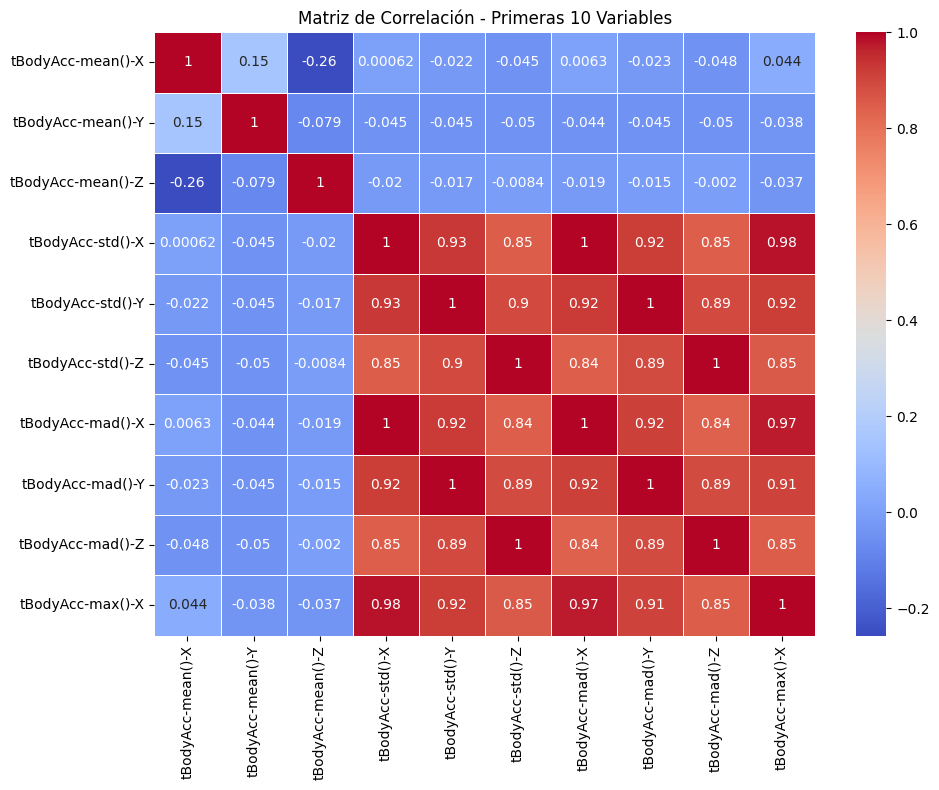

In [18]:
# ============================================
# BLOQUE 3.2 - MATRIZ DE CORRELACIÓN DE VARIABLES PRINCIPALES (corregido)
# ============================================

# Seleccionar algunas variables de interés (primeras 10 características)
variables_interes = df_train.columns[2:12]  # Evitamos 'subject' y 'activity'

# Calcular matriz de correlación
correlation_matrix = df_train[variables_interes].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación - Primeras 10 Variables')
plt.tight_layout()
plt.savefig('../results/matriz_correlacion_primeras_variables.png')
plt.show()

In [19]:
# ============================================
# BLOQUE 4.1 - ANÁLISIS DE SUJETOS PARTICIPANTES
# ============================================

# Ver valores únicos en la columna 'subject'
print("👤 Sujetos únicos en el dataset:")
print(df_train['subject'].unique())

# Contar muestras por sujeto
sujeto_conteo = df_train['subject'].value_counts().sort_index()

print("\n📊 Cantidad de muestras por sujeto:")
print(sujeto_conteo)


👤 Sujetos únicos en el dataset:
[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]

📊 Cantidad de muestras por sujeto:
subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: count, dtype: int64


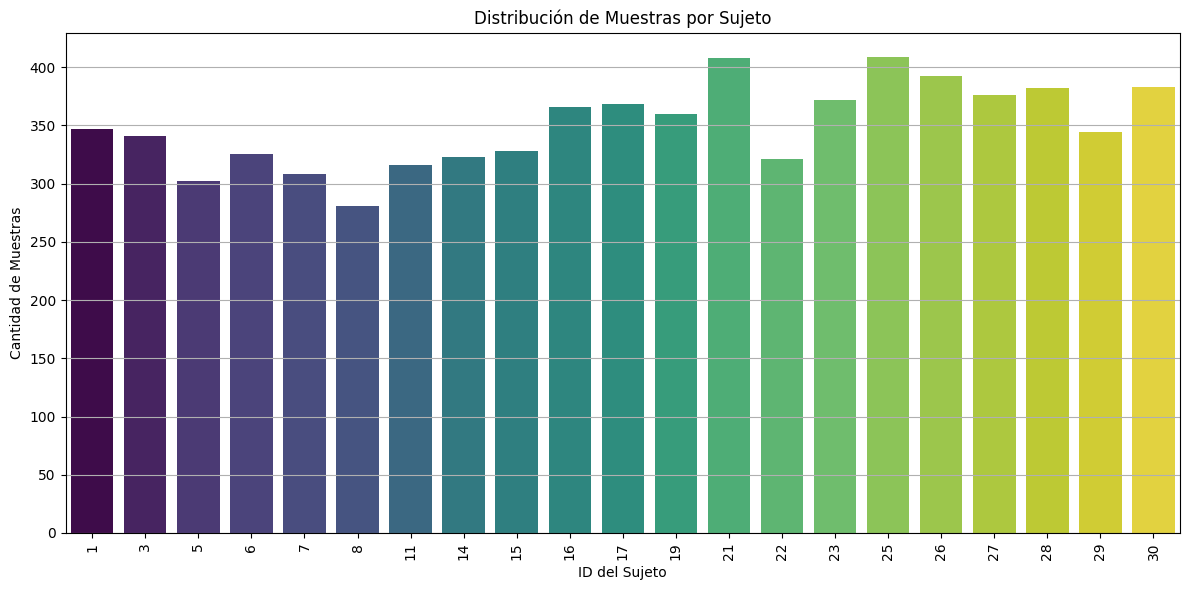

In [21]:
# ============================================
# BLOQUE 4.2 - GRÁFICO DE BARRAS - DISTRIBUCIÓN DE MUESTRAS POR SUJETO (CORREGIDO)
# ============================================

plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='subject', hue='subject', palette='viridis', legend=False)
plt.title('Distribución de Muestras por Sujeto')
plt.xlabel('ID del Sujeto')
plt.ylabel('Cantidad de Muestras')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../results/distribucion_muestras_por_sujeto.png')
plt.show()

In [22]:
# ============================================
# CIERRE DEL EDA
# ============================================

print("✅ Análisis Exploratorio de Datos (EDA) completado exitosamente.")
print("📊 Dataset listo para proceder al preprocesamiento.")


✅ Análisis Exploratorio de Datos (EDA) completado exitosamente.
📊 Dataset listo para proceder al preprocesamiento.
